### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

raw_df = data.copy()

df = raw_df.copy()

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

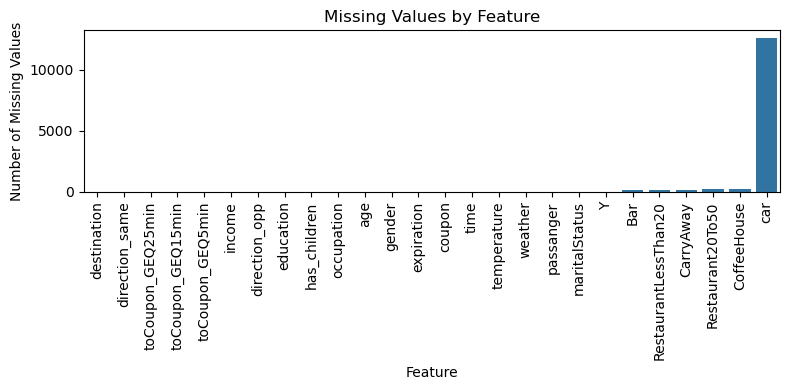

In [4]:
##########################################
##########################################
#        Missing Values by Feature
#
# This plot shows the number of missing 
# values for each feature in the dataset.
##########################################
##########################################




missing_df = (
    df.isnull()
    .sum()
    .reset_index()
)


missing_df.columns = ["feature", "missing_count"]

missing_df = missing_df.sort_values("missing_count")


plt.figure(figsize = (8, 4))

sns.barplot(
    data = missing_df,
    x = "feature",
    y = "missing_count"
)

plt.ylabel("Number of Missing Values")
plt.xlabel("Feature")
plt.title("Missing Values by Feature")
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()





#### Missing Values by Features
This plot shows the number of missing values for each feature in the dataset.
The `car` feature is missing a significant number of values and was not used in subsequent analyses.

3. Decide what to do about your missing data -- drop, replace, other...

I did not globally drop missing data. Missing values were removed only for variables required for each analysis.
Duplicate rows were not removed because it is not possible to determine whether identical responses represent repeated submissions by the same individual or distinct responses from different drivers with similar characterisitics. 

4. What proportion of the total observations chose to accept the coupon?



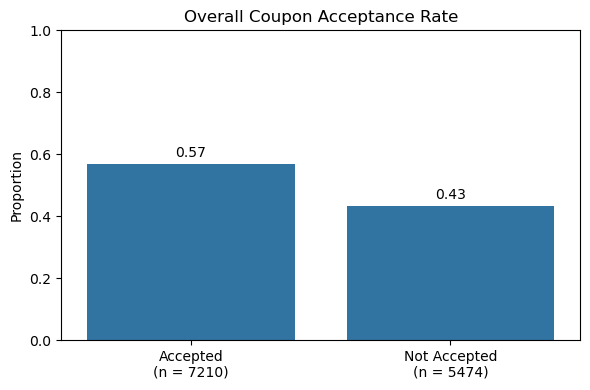

In [5]:
##########################################
##########################################
#     Overall Coupon Acceptance Rate
#
# This plot shows the overall proportion
# of drivers that accepted a coupon
# versus those that didn't. 
##########################################
##########################################



summary = pd.DataFrame({
    "Outcome" : ["Accepted", "Not Accepted"],
    "Proportion" : [df["Y"].mean(), 1 - df["Y"].mean()],
    "Count" : [(df["Y"] == 1).sum(), (df["Y"] == 0).sum()]
})


summary["label"] = summary["Outcome"] + "\n(n = " + summary["Count"].astype(str) + ")"

plt.figure(figsize = (6, 4))

ax = sns.barplot(
    data = summary,
    x = "label",
    y = "Proportion"
)


for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.xlabel("")
plt.title("Overall Coupon Acceptance Rate")


plt.tight_layout()
plt.show()





#### Overall Coupon Acceptance Rate
This plot shows the overall proportion of observations that accepted a coupon versus those who didn't.
The sample sizes are included to provide context for the displayed proportions.

5. Use a bar plot to visualize the `coupon` column.

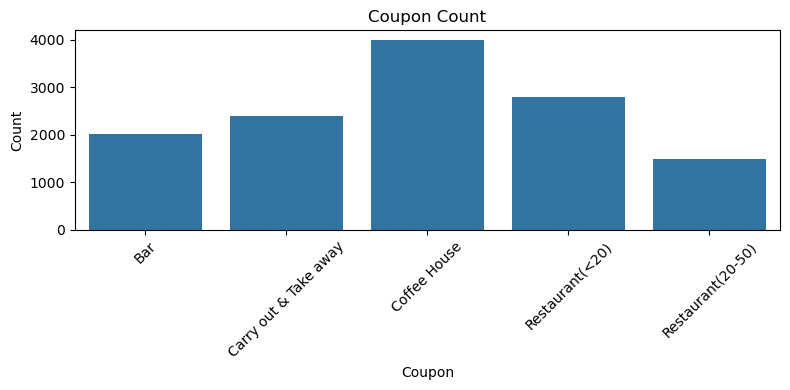

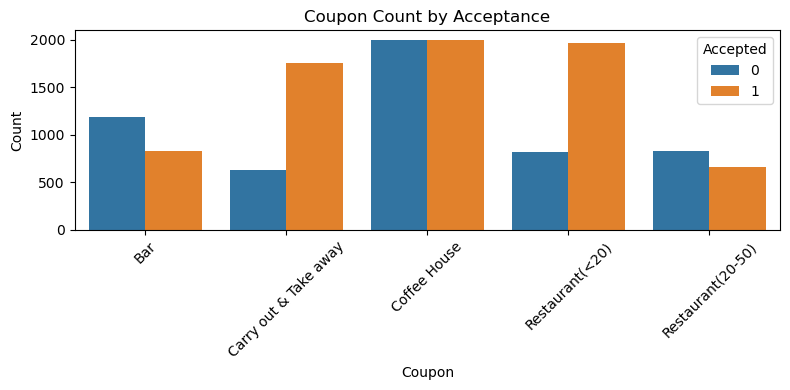

In [6]:
##########################################
##########################################
#             Coupon Count
#
# This plot shows the total number of 
# observations of each coupon
# offered in the dataset.
##########################################
##########################################

coupon_order = [
    "Bar",
    "Carry out & Take away",
    "Coffee House",
    "Restaurant(<20)",
    "Restaurant(20-50)"
]


coupon_count = df["coupon"].value_counts().reset_index()

coupon_count.columns = ["coupon", "count"]



coupon_count["coupon"] = pd.Categorical(
    coupon_count["coupon"],
    categories = coupon_order,
    ordered = True
)

coupon_count = coupon_count.sort_values("coupon")


plt.figure(figsize = (8, 4))


sns.barplot(
    data = coupon_count,
    x = "coupon",
    y = "count"
)


plt.title("Coupon Count")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.xlabel("Coupon")

plt.tight_layout()
plt.show()




##########################################
##########################################
#     Coupon Count by Acceptance
#
# This plot shows the total number of 
# accepted and non-accepted coupons
# for each coupon type.
##########################################
##########################################





coupon_acceptance = (
    df.groupby(["coupon", "Y"])
    .size()
    .reset_index(name = "count")
)


coupon_acceptance["coupon"] = pd.Categorical(
    coupon_acceptance["coupon"],
    categories = coupon_order,
    ordered = True
)

coupon_acceptance = coupon_acceptance.sort_values("coupon")



plt.figure(figsize = (8, 4))

sns.barplot(
    data = coupon_acceptance,
    x = "coupon",
    y = "count",
    hue = "Y"
)


plt.title("Coupon Count by Acceptance")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.xlabel("Coupon")
plt.legend(title = "Accepted")


plt.tight_layout()
plt.show()



#### Coupon Count:
This plot shows the total number of observations for each coupon type in the dataset.

#### Coupon Count By Acceptance:
This plot shows the number of accepted and non-accepted coupons for each coupon type.

6. Use a histogram to visualize the temperature column.

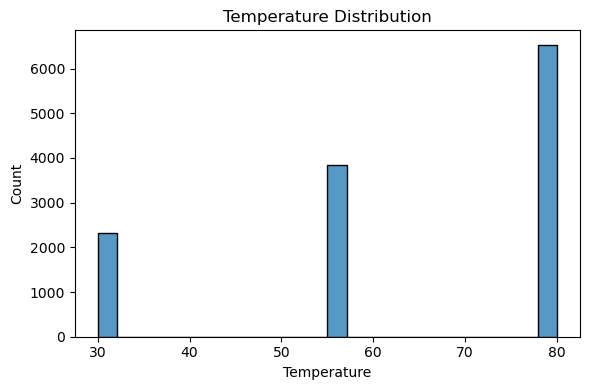

In [7]:
##########################################
##########################################
#        Temperature Distribution
#
# This plot shows the distribution
# of temperatures in the dataset.
##########################################
##########################################



plt.figure(figsize = (6, 4))

sns.histplot(
    data = df,
    x = "temperature"
)

plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Temperature Distribution")

plt.tight_layout()
plt.show()






#### Temperature Distribution
This plot visualizes the distribution of temperature values in the dataset.
Most observations occur at 80 degrees.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [8]:
bar_df = df[df["coupon"] == "Bar"].copy()

#bar_df is referenced in the next question only.
#In the following examples, df is referenced directly.

2. What proportion of bar coupons were accepted?


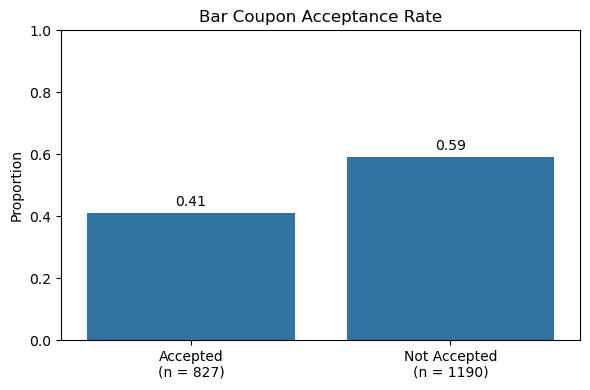

In [9]:
##########################################
##########################################
#        Bar Coupon Acceptance Rate
#
# This plot shows the overall proportion
# of observations that accepted a bar coupon
# versus those that didn't. 
##########################################
##########################################



summary = pd.DataFrame({
    
    "Outcome" : ["Accepted", "Not Accepted"],
    "Proportion" : [bar_df["Y"].mean(), 1 - bar_df["Y"].mean()],
    "Count" : [(bar_df["Y"] == 1).sum(), (bar_df["Y"] == 0).sum()]

})



summary["label"] = summary["Outcome"] + "\n(n = " + summary["Count"].astype(str) + ")"




plt.figure(figsize = (6, 4))

ax = sns.barplot(
    data = summary,
    x = "label",
    y = "Proportion"
)


for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.xlabel("")
plt.title("Bar Coupon Acceptance Rate")



plt.tight_layout()
plt.show()




#### Bar Coupon Analysis A
This plot shows the proportion of observations that accepted a bar coupon versus those that did not.
The acceptance rate for bar coupons is lower than the overall coupon acceptance rate.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


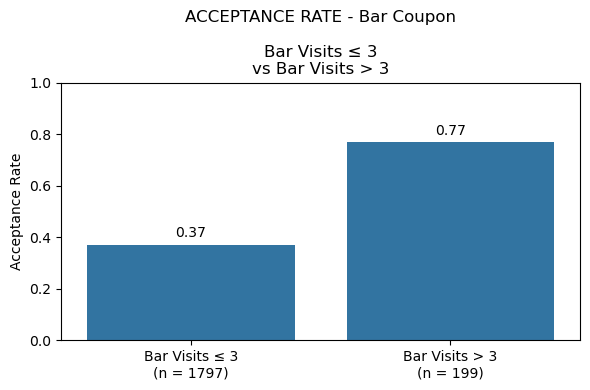

In [10]:
##########################################
##########################################
#      ACCEPTANCE RATE - Bar Coupon

#             Bar Visits ≤ 3
#           vs Bar Visits > 3
##########################################
##########################################




#Filters bar coupons only
eda_df = df[df["coupon"] == "Bar"].copy()

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset=["Bar", "Y"])


##########################################
#Define logical condition 
##########################################

#Drivers who go to bars less than or equal to 3 times a month
eda_df["bar_le_3"] = eda_df["Bar"].isin(["never", "less1", "1~3"])


#Assign each group labels
eda_df["group"] = "Bar Visits > 3"

eda_df.loc[eda_df["bar_le_3"], "group"] = "Bar Visits ≤ 3"



##########################################
#Summarize acceptance rates by group
##########################################

summary = (
    eda_df
        .groupby("group")
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)



##########################################
#Order groups for plotting
##########################################


summary["order"] = summary["group"].map({
    "Bar Visits ≤ 3": 0,
    "Bar Visits > 3": 1
})


summary = summary.sort_values("order")

summary = summary.drop(columns = "order")


#Create plot labels including sample size
summary["label"] = summary["group"] + "\n(n = " + summary["total"].astype(str) + ")"



##########################################
#Plot acceptance rates
##########################################

plt.figure(figsize = (6, 4))


ax = sns.barplot(
    data = summary,
    x = "label",
    y = "acceptance_rate"
)


#Add acceptance rate to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)


plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("")
plt.title(
    "ACCEPTANCE RATE - Bar Coupon\n\n"
    "Bar Visits ≤ 3\n"
    "vs Bar Visits > 3"
)

plt.tight_layout()
plt.show()






#### Bar Coupon Analysis B
This plot compares bar coupon acceptance rates between drivers who visit bars 3 or fewer times per month and those who visit bars more frequently.
Acceptance rates are higher among frequent bar visitors.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


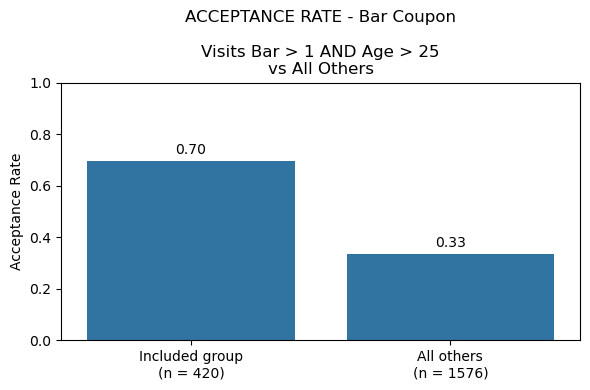

In [11]:
##########################################
##########################################
#     ACCEPTANCE RATE - Bar Coupon

#        Visits Bar > 1 AND Age > 25
#            vs All Others
##########################################
##########################################





#Filters bar coupons only
eda_df = df[df["coupon"] == "Bar"].copy()

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset=["Bar", "age", "Y"])



##########################################
#Define logical conditions for included group
##########################################

#Drivers who go to bars more than once a month
eda_df["bar_gt_1"] = eda_df["Bar"].isin(["1~3", "4~8", "gt8"])

#Drivers whose age is greater than 25 years old
eda_df["age_gt_25"] = eda_df["age"].isin(["26", "31", "36", "41", "46", "50plus"])


##########################################
#Combine conditions into a single included group
##########################################

included_condition = eda_df["bar_gt_1"] & eda_df["age_gt_25"]


#Assign each group labels
eda_df["group"] = "All others"

eda_df.loc[included_condition, "group"] = "Included group"


##########################################
#Summarize acceptance rates by group
##########################################

summary = (
    eda_df
        .groupby("group")
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)



##########################################
#Order groups for plotting
##########################################

summary["order"] = summary["group"].map({
    "Included group": 0,
    "All others": 1
})


summary = summary.sort_values("order")

summary = summary.drop(columns = "order")


#Create plot labels including sample size
summary["label"] = summary["group"] + "\n(n = " + summary["total"].astype(str) + ")"




##########################################
#Plot acceptance rates
##########################################

plt.figure(figsize = (6, 4))


ax = sns.barplot(
    data = summary,
    x = "label",
    y = "acceptance_rate"
)


#Add acceptance rate to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("")
plt.title(
    "ACCEPTANCE RATE - Bar Coupon\n\n"
    "Visits Bar > 1 AND Age > 25\n"
    "vs All Others"
)

plt.tight_layout()
plt.show()







#### Bar Coupon Analysis C
This plot compares bar coupon acceptance rates for drivers who visit bars more than once per month and are 25 years old versus all other drivers. The included group demonstrates a higher acceptance rate.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


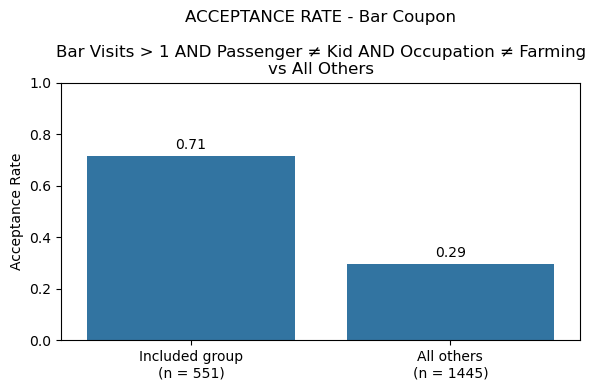

In [12]:
##########################################
##########################################
#     ACCEPTANCE RATE - Bar Coupon

#             Visits bar > 1 
#          AND Passenger ≠ Kid 
#       AND Occupation ≠ Farming
#            vs All Others
##########################################
##########################################





#Filters bar coupons only
eda_df = df[df["coupon"] == "Bar"].copy()

#Fixes column name typo 
eda_df = eda_df.rename(columns = {"passanger": "passenger"})

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset = ["Bar", "passenger", "occupation", "Y"])



##########################################
#Define logical conditions for included group
##########################################

#Drivers who go to bars more than once a month
eda_df["bar_gt_1"] = eda_df["Bar"].isin(["1~3", "4~8", "gt8"])

#Drivers whose passengers aren't kids
eda_df["passenger_not_kid"] = eda_df["passenger"].isin(["Alone", "Friend(s)", "Partner"])

#Drivers whose occupation isn't farming, fishing or forestry
eda_df["occupation_not_farming"] = ~eda_df["occupation"].isin(["Farming Fishing & Forestry"])


##########################################
#Combine conditions into a single included group
##########################################

included_condition = (
    eda_df["bar_gt_1"] &
    eda_df["passenger_not_kid"] &
    eda_df["occupation_not_farming"]
)

#Assign each group labels
eda_df["group"] = "All others"
eda_df.loc[included_condition, "group"] = "Included group"




##########################################
#Summarize acceptance rates by group
##########################################
summary = (
    eda_df
        .groupby("group")
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)


##########################################
#Order groups for plotting
##########################################
summary["order"] = summary["group"].map({
    "Included group": 0,
    "All others": 1
})

summary = summary.sort_values("order")

summary = summary.drop(columns = "order")



#Create plot labels including sample size
summary["label"] = summary["group"] + "\n(n = " + summary["total"].astype(str) + ")"




##########################################
#Plot acceptance rates
##########################################

plt.figure(figsize = (6, 4))

ax = sns.barplot(
    data = summary,
    x = "label",
    y = "acceptance_rate"
)



#Add acceptance rate to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("")
plt.title(
    "ACCEPTANCE RATE - Bar Coupon\n\n"
    "Bar Visits > 1 AND Passenger ≠ Kid AND Occupation ≠ Farming\n"
    "vs All Others"
)

plt.tight_layout()
plt.show()






#### Bar Coupon Analysis D
This plot compares bar coupon acceptance rates for drivers who frequently visit bars, are not traveling with kids, and do not work in farming related occupations versus all other drivers. The included group shows a higher acceptance rate.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



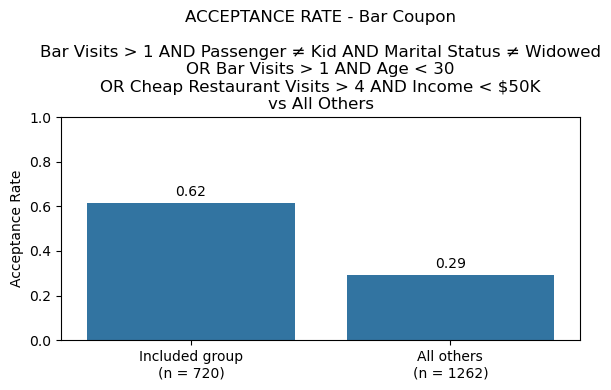

In [13]:
##########################################
##########################################
#     ACCEPTANCE RATE - Bar Coupon
#            Visits bar > 1 
#         AND Passenger ≠ Kid 
#     AND Marital Status ≠ Widowed
#                 OR
#           Visits bar > 1
#            AND Age < 30
#                 OR
#      Visits cheap restaurant > 4 
#            AND Income < $50k
#             vs All Others
##########################################
##########################################




#Filters bar coupons only
eda_df = df[df["coupon"] == "Bar"].copy()

#Fixes column name typo
eda_df = eda_df.rename(columns = {"passanger": "passenger"})

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset = ["Bar", "passenger", "maritalStatus", "age", "RestaurantLessThan20", "income", "Y"])


##########################################
#Define logical conditions for included group
##########################################

#Drivers who go to bars more than once a month
eda_df["bar_gt_1"] = eda_df["Bar"].isin(["1~3", "4~8", "gt8"])

#Drivers whose passengers aren't kids
eda_df["passenger_not_kid"] = eda_df["passenger"].isin(["Alone", "Friend(s)", "Partner"])

#Drivers who aren't widowed
eda_df["marital_not_widowed"] = eda_df["maritalStatus"].isin(["Unmarried partner", "Single", "Married partner", "Divorced"])

#Drivers whose age is less than 30 years old
eda_df["age_lt_30"] = eda_df["age"].isin(["below21", "21", "26"])

#Drivers who go to cheap restaurants more than 4 times a month
eda_df["cheap_rest_gt_4"] = eda_df["RestaurantLessThan20"].isin(["4~8", "gt8"])

#Drivers whose income is less than 50k
eda_df["income_lt_50k"] = eda_df["income"].isin(["$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])




##########################################
#Combine conditions into a single included group
##########################################

included_condition = (
    (
        eda_df["bar_gt_1"] &
        eda_df["passenger_not_kid"] &
        eda_df["marital_not_widowed"]
    )
    |
    (
        eda_df["bar_gt_1"] &
        eda_df["age_lt_30"]
    )
    |
    (
        eda_df["cheap_rest_gt_4"] &
        eda_df["income_lt_50k"]
    )
)

#Assign each group labels
eda_df["group"] = "All others"
eda_df.loc[included_condition, "group"] = "Included group"




##########################################
#Summarize acceptance rates by group
##########################################


summary = (
    eda_df
        .groupby("group")
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)


##########################################
#Order groups for plotting
##########################################

summary["order"] = summary["group"].map({
    "Included group": 0,
    "All others": 1
})


summary = summary.sort_values("order")

summary = summary.drop(columns = "order")



#Create plot labels including sample size
summary["label"] = summary["group"] + "\n(n = " + summary["total"].astype(str) + ")"

##########################################
#Plot acceptance rates
##########################################


plt.figure(figsize = (6,4))


ax = sns.barplot(
    data = summary,
    x = "label",
    y = "acceptance_rate"
)



#Add acceptance rates to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("")
plt.title(
    "ACCEPTANCE RATE - Bar Coupon\n\n"
    "Bar Visits > 1 AND Passenger ≠ Kid AND Marital Status ≠ Widowed\n"
    "OR Bar Visits > 1 AND Age < 30\n"
    "OR Cheap Restaurant Visits > 4 AND Income < $50K\n"
    "vs All Others"
)

plt.tight_layout()
plt.show()






#### Bar Coupon Analysis E
This plot compares bar coupon acceptance rates for drivers who visit bars more than once per month, are not traveling with kids, and are not widowed, OR visit bars more than once per month and are under 30 years old, OR visit cheap restaurants more than four times per month and have an income below $50k, versus all other drivers. The included group shows a higher acceptance rate.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Bar coupon acceptance appears to be higher among drivers who already visit bars more than once per month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Investigation Part 1: Restaurant(<20)

### Introduction
This analysis explores whether acceptance of Restaurant(<20) coupons depends more on social context or time of day. I focus on drivers with no urgent destination and compare acceptance rates across social and non-social passengers and dinner vs non-dinner time periods.

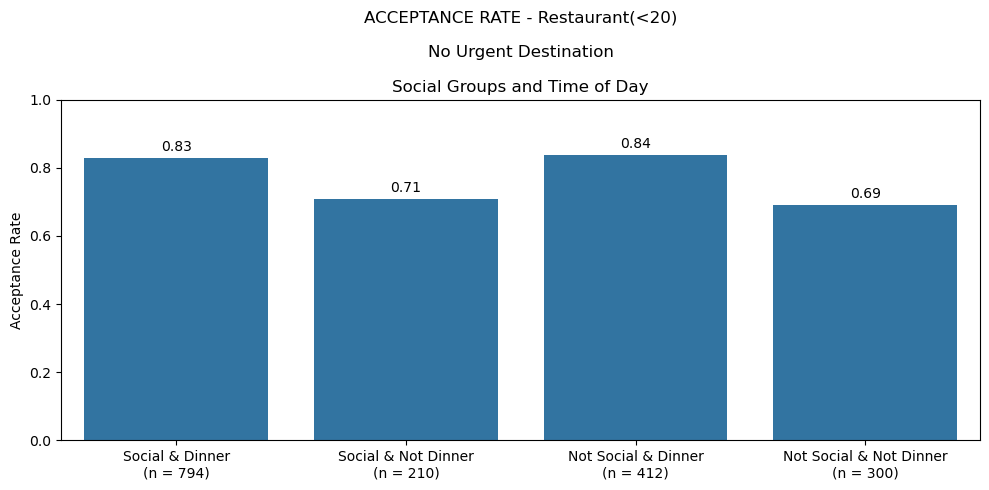

In [14]:
##########################################
##########################################
#     ACCEPTANCE RATE - Restaurant(<20)
#           No Urgent Destination
#        Social Groups and Time of Day
##########################################
##########################################


#Filters restaurant < 20 coupons only
eda_df = df[df["coupon"] == "Restaurant(<20)"].copy()

#Fixes column name typo
eda_df = eda_df.rename(columns={"passanger": "passenger"})

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset=["destination", "passenger", "time", "Y"])

#Filters drivers with no urgent destination
eda_df = eda_df[eda_df["destination"] == "No Urgent Place"]




##########################################
#Define passenger and time groups
##########################################

eda_df["passenger_group"] = eda_df["passenger"].isin(["Friend(s)", "Partner"])

eda_df["time_group"] = eda_df["time"].isin(["2PM", "6PM"])





##########################################
#Assign combined social/time groups
##########################################


eda_df["group"] = "MISSING DATA"

eda_df.loc[
    eda_df["passenger_group"] & eda_df["time_group"],
    "group"
] = "Social & Dinner"

eda_df.loc[
    eda_df["passenger_group"] & ~eda_df["time_group"],
    "group"
] = "Social & Not Dinner"

eda_df.loc[
    ~eda_df["passenger_group"] & eda_df["time_group"],
    "group"
] = "Not Social & Dinner"

eda_df.loc[
    ~eda_df["passenger_group"] & ~eda_df["time_group"],
    "group"
] = "Not Social & Not Dinner"






##########################################
#Summarize acceptance rates by group
##########################################

summary = (
    eda_df
        .groupby("group")
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)


##########################################
#Order groups for plotting
##########################################

summary["order"] = summary["group"].map({
    "Social & Dinner": 0,
    "Social & Not Dinner": 1,
    "Not Social & Dinner": 2,
    "Not Social & Not Dinner": 3
})


summary = summary.sort_values("order")

summary = summary.drop(columns = "order")



#Create plot labels including sample size
summary["label"] = summary["group"] + "\n(n = " + summary["total"].astype(str) + ")"

##########################################
#Plot acceptance rates
##########################################



plt.figure(figsize = (10, 5))



ax = sns.barplot(
    data = summary,
    x = "label",
    y = "acceptance_rate"
)

#Add acceptance rate to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("")
plt.title(
    "ACCEPTANCE RATE - Restaurant(<20)\n\n"
    "No Urgent Destination\n\n"
    "Social Groups and Time of Day"
)

plt.tight_layout()
plt.show()







### Summary
Acceptance rates for Restaurant(<20) coupons are highest during dinner hours, regardless of social context. Outside of dinner time, acceptance drops for both social and non-social groups. This suggests that time of day has a stronger influence on coupon acceptance than whether a driver is travelling socially.

## Investigation Part 2: Carry Out & Take Away

### Introduction
This analysis explores whether acceptance of Carry Out & Take Away coupons varries by passenger type and weather conditions. I focus on drivers with no urgent destination and compare acceptance rates across different passenger groups and weather categories.

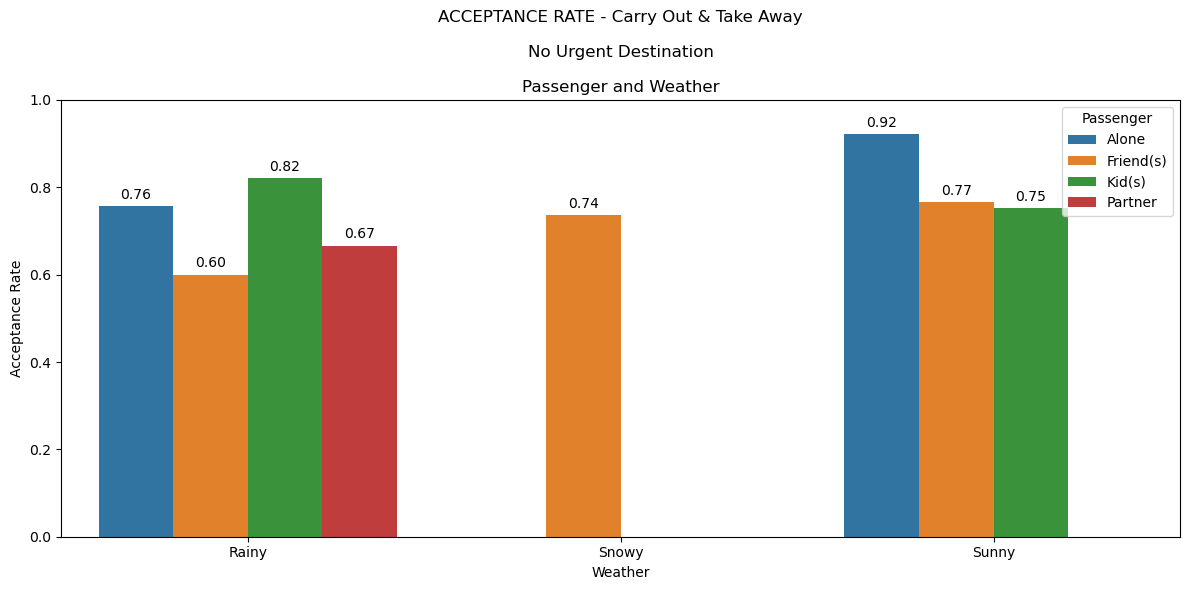

,weather,passenger,total,acceptance_rate
0,Rainy,Alone,37,0.756757
2,Rainy,Friend(s),5,0.600000
5,Rainy,Kid(s),39,0.820513
7,Rainy,Partner,36,0.666667
3,Snowy,Friend(s),174,0.735632
1,Sunny,Alone,38,0.921053
4,Sunny,Friend(s),560,0.766071
6,Sunny,Kid(s),89,0.752809


In [15]:
##########################################
##########################################
# ACCEPTANCE RATE - Carry Out & Take Away
#          No Urgent Destination
#          Passenger and Weather
##########################################
##########################################




#Filters carry out and take away coupons only
eda_df = df[df["coupon"] == "Carry out & Take away"].copy()

#Fixes column name typo
eda_df = eda_df.rename(columns = {"passanger": "passenger"})

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset = ["passenger", "weather", "Y"])

#Filters drivers with no urgent destination
eda_df = eda_df[eda_df["destination"] == "No Urgent Place"]


##########################################
#Summarize acceptance rates by passenger and weather
##########################################


summary = (
    eda_df
        .groupby(["passenger", "weather"])
        .agg(
            total = ("Y", "size"),
            accepted = ("Y", "sum"),
            acceptance_rate = ("Y", "mean")
        )
        .reset_index()
)


##########################################
#Order groups for plotting
##########################################

weather_order = ["Rainy", "Snowy", "Sunny"]

passenger_order = ["Alone", "Friend(s)", "Kid(s)", "Partner"]


summary["weather"] = pd.Categorical(
    summary["weather"],
    categories = weather_order,
    ordered = True
)


summary["passenger"] = pd.Categorical(
    summary["passenger"],
    categories = passenger_order,
    ordered = True
)


summary = summary.sort_values(["weather", "passenger"])



##########################################
#Plot acceptance rates
##########################################


plt.figure(figsize = (12, 6))



ax = sns.barplot(
    data = summary,
    x = "weather",
    y = "acceptance_rate",
    hue = "passenger"
)




#Add acceptance rate to bars
for container in ax.containers:
    ax.bar_label(container, fmt = "%.2f", padding = 3)

plt.ylim(0, 1)
plt.ylabel("Acceptance Rate")
plt.xlabel("Weather")

plt.title(
    "ACCEPTANCE RATE - Carry Out & Take Away\n\n"
    "No Urgent Destination\n\n"
    "Passenger and Weather"
)

plt.legend(title = "Passenger")
plt.tight_layout()
plt.show()



##########################################
#Display summary table
##########################################


summary[["weather", "passenger", "total", "acceptance_rate"]]








### Summary
Acceptance rates for Carry Out & Take Away coupons vary noticeably by weather and passenger type. Acceptance is generally higher under sunny conditions, particularly for drivers traveling alone or with friends, while snowy conditions show lower acceptance overall. NOTE: some passenger-weather combinations have very small sample sizes, so conclusions should be interpreted cautiously.

## Investigation Part 3: Coffee House

## Introduction
This analysis explores whether acceptance of Coffee House coupons varies by passenger type at different times of day. I focus on drivers with no urgent destination and compare acceptance rates across passenger groups for each time period.

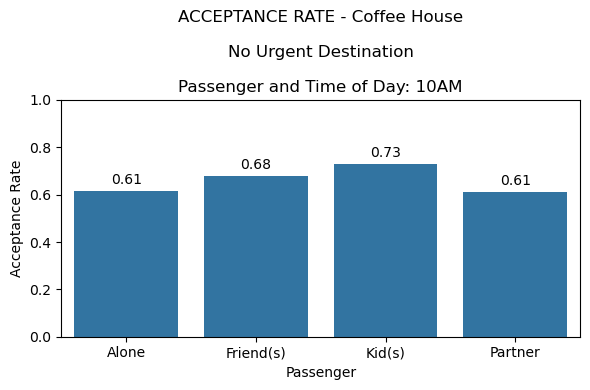

,time,passenger,total,acceptance_rate
0,10AM,Alone,371,0.614555
1,10AM,Friend(s),319,0.677116
2,10AM,Kid(s),37,0.729730
3,10AM,Partner,172,0.610465


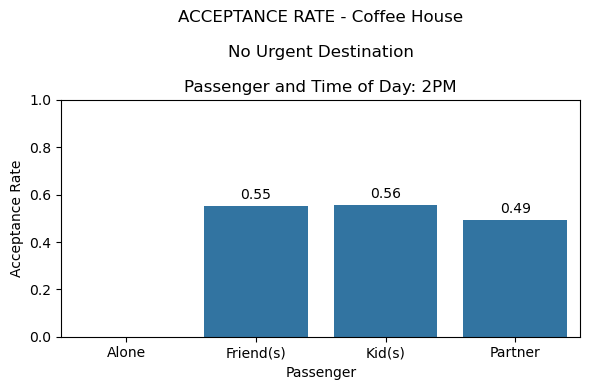

,time,passenger,total,acceptance_rate
0,2PM,Friend(s),638,0.553292
1,2PM,Kid(s),81,0.555556
2,2PM,Partner,75,0.493333


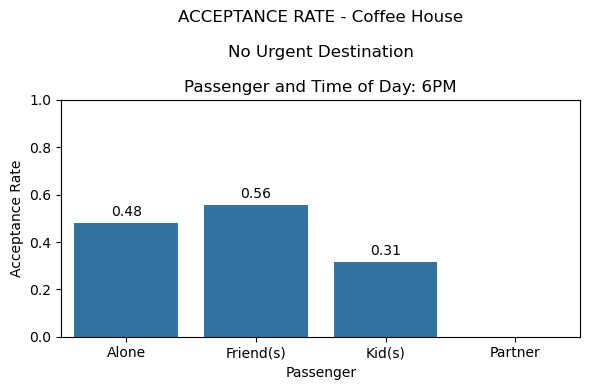

,time,passenger,total,acceptance_rate
0,6PM,Alone,102,0.480392
1,6PM,Friend(s),167,0.556886
2,6PM,Kid(s),89,0.314607


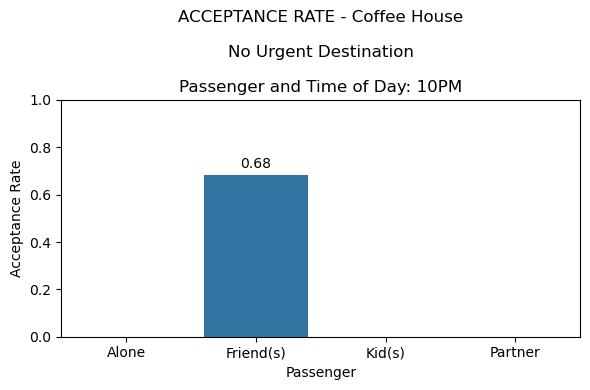

,time,passenger,total,acceptance_rate
0,10PM,Friend(s),104,0.682692


In [17]:
##########################################
##########################################
#     ACCEPTANCE RATE - Coffee House
#          No Urgent Destination
#        Passenger and Time of Day
##########################################
##########################################



#Filters coffee house coupons only
eda_df = df[df["coupon"] == "Coffee House"].copy()

#Fixes column name typo
eda_df = eda_df.rename(columns={"passanger": "passenger"})

#Drops rows with NaN in this analysis
eda_df = eda_df.dropna(subset=["time", "passenger", "Y"])


#Filters drivers with no urgent destination
eda_df = eda_df[eda_df["destination"] == "No Urgent Place"]



##########################################
#Iterate through times and generate plots
##########################################



time_order = ["7AM", "10AM", "2PM", "6PM", "10PM"]




for time_value in time_order:

    #Single time of day
    time_df = eda_df[eda_df["time"] == time_value]

    #Skip times with no observations
    if time_df.empty:
        continue

    
    ##########################################
    #Summarize acceptance rates by passenger
    ##########################################
    summary = (
        time_df
            .groupby("passenger")
            .agg(
                total = ("Y", "size"),
                accepted = ("Y", "sum"),
                acceptance_rate = ("Y", "mean")
            )
            .reset_index()
    )


    ##########################################
    #Order groups for plotting
    ##########################################

    passenger_order = ["Alone", "Friend(s)", "Kid(s)", "Partner"]


    summary["passenger"] = pd.Categorical(
        summary["passenger"],
        categories = passenger_order,
        ordered = True
    )



    summary = summary.sort_values("passenger")

    ##########################################
    #Plot acceptance rates
    ##########################################

    plt.figure(figsize = (6, 4))

    ax = sns.barplot(
        data = summary,
        x = "passenger",
        y = "acceptance_rate"
    )

    #Add acceptance rate to bars
    for container in ax.containers:
        ax.bar_label(container, fmt = "%.2f", padding = 3)

    plt.ylim(0, 1)
    plt.ylabel("Acceptance Rate")
    plt.xlabel("Passenger")

    plt.title(
        "ACCEPTANCE RATE - Coffee House\n\n"
        "No Urgent Destination\n\n"
        f"Passenger and Time of Day: {time_value}"
    )

    plt.tight_layout()
    plt.show()



    ##########################################
    #Display summary table
    ##########################################

    summary["time"] = time_value

    summary_sorted = summary.sort_values("passenger")

    display(
        summary_sorted[["time", "passenger", "total", "acceptance_rate"]]
    )






### Summary
Acceptance rates for Coffee House coupons vary by passenger type across different times of day. Morning and late-evening periods show higher acceptance among drivers traveling with friends, while acceptance tends to be lower or absent for certain passenger groups at other times. NOTE: some time-passenger combinations have no observations.

## Overall Conclusions
Across all investigations, coupon acceptance appears to depend strongly on context rather than any single demographic factor. Bar coupon acceptance is most strongly associated with previous bar visiting behavior, while restaurant and carry out coupons show clearer relationships with time of day, weather, and passenger type. Coffee House coupon acceptance varies significantly by time and social context, with several combinations showing no observations. Overall, these results suggest that coupon effectiveness is highly situational and should be interpreted in the context in which the offer is received. 